In [1]:
# Imports
from ML import myPCA 
# Clase myPCA esta en la librería ML (La idea es ir llenando esta librería con todas las implementaciones de algoritmos, que hagamos en el curso) 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parte 1
1. Implemente un método que cargue el set de datos a memoria
2. Elimine las columnas que considere que no son relevantes para su análisis y utilice documentación interna para justificar su razonamiento. 
3. Luego con las columnas restantes elimine cualquier entrada que posea datos faltantes.
4. Utilice one-hot encoding para convertir las variables categóricas en variables numéricas.

Tamaño de datos:
 (1309, 12)
Tipos de Columnas:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columnas con NA:
 Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Cantidad de NA por columna:
 Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


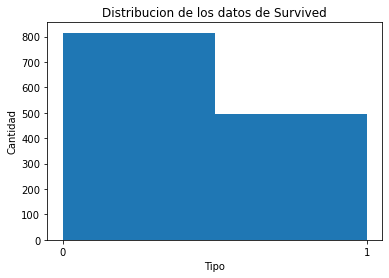

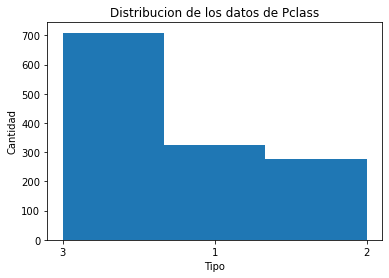

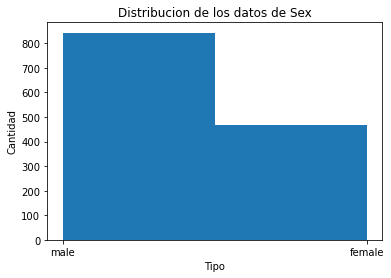

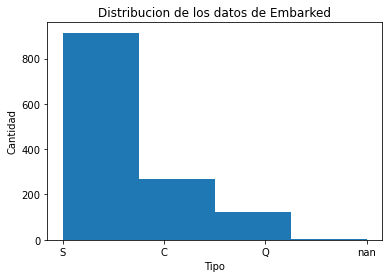

Se borran en total 264 registros


In [2]:
def chargeData():
    return pd.read_csv('titanic.csv',delimiter=",",decimal=".")

def inspectData(df):
    print("Tamaño de datos:\n",df.shape)
    print("Tipos de Columnas:\n",df.dtypes)
    NaNColumns = df.columns[df.isna().any()]
    print("Columnas con NA:\n",NaNColumns)
    print("Cantidad de NA por columna:\n",df[NaNColumns].isnull().sum(axis = 0))

def graficar(df):
    categoricalColumns = ['Survived','Pclass','Sex','Embarked']
    categoricos = df.loc[:,categoricalColumns]

    for column in categoricos.columns:
        datos = categoricos.loc[:,column]
        categorias = datos.unique()
        mapeo = {}
        for i in range(len(categorias)):
            mapeo[categorias[i]] = i
        plt.hist(datos.map(mapeo),bins=len(categorias))
        plt.title("Distribucion de los datos de "+column)
        plt.xlabel("Tipo")
        plt.ylabel("Cantidad")
        plt.xticks(range(len(categorias)),categorias)
        plt.show()

def deleteData(df):
    '''
    Columnas borradas:
    1. PassengerId: Es un dato que ayuda solo a reconocer pasajeros y no hace ningún efecto en poder clasificar si alguien vive o muere
    2. Name:  Es un dato que ayuda solo a reconocer pasajeros y no hace ningún efecto en poder clasificar si alguien vive o muere
    3. Ticket:  Es un dato que ayuda solo a reconocer pasajeros y no hace ningún efecto en poder clasificar si alguien vive o muere
    4. Cabin: Tiene valores que son mas del 75% NaN, por lo que no aporta a un correcto analisis.
    5. Embarked: No veo una gran relacion entre estas variables, mi teoría se sustenta aun mas cuando veo a partir de los graficos 
    de los categoricos que parece que esta variable se encuentra muy sesgada hacia la categoria "S"
    '''
    df.drop(columns = ["PassengerId" ,"Name","Cabin","Ticket","Embarked"],inplace=True)
    before = df.shape
    '''
    Se borra las filas NaN
    '''
    df.dropna(inplace= True)
    print("Se borran en total",(before[0]-df.shape[0]),"registros")
    
    return df



def getData():
    # Implemente un método que cargue el set de datos a memoria (puede utilizar la biblioteca pandas para esto).
    df = chargeData()
    # Se realiza una inspección inicial de los datos
    inspectData(df)
    # Se realiza una inspección extra de los datos categoricos a nivel grafico
    graficar(df)
    # Se elimina las variables que se determinaron que se deben de eliminar
    deleteData(df)
    # Se crea el one-hot encoding
    categoricalColumns = ['Survived','Pclass','Sex']
    df = pd.get_dummies(df,columns=categoricalColumns)
    return df

df = getData()

    


# Parte 2
Convierta los datos obtenidos en el punto anterior en una matriz de numpy.

In [3]:
matrixArray = df.to_numpy()

# Parte 3
Implemente una clase llamada myPCA que permita recibir una matriz numpy de datos y obtener la matriz de componentes principales C, así como las inercias y los puntos necesarios para dibujar el círculo de correlación. 

In [4]:
my_pca = myPCA(matrixArray) 
# print("1.Valores propios\n",my_pca.eigVal)
# print("2.Inercia\n",np.round(my_pca.inertia,3))
# print("3.Vectores Propios\n",np.round(my_pca.eigVec,5))
# print("4.Tamaño de Matriz\n",my_pca.matrixArray.shape)
# print("5.Matriz de componentes\n",my_pca.C)

# Parte 4

Grafique los datos sobre sus componentes principales y coloree los puntos según su valor “Survived”. Grafique el círculo de correlación del modelo

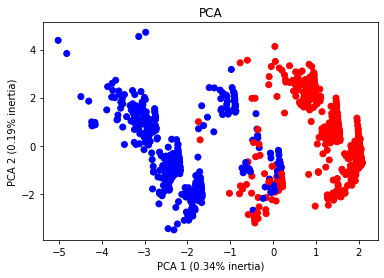

In [5]:
plt.scatter(np.ravel(my_pca.C[:,0]),np.ravel(my_pca.C[:,1]),c = ['b' if i==1 else 'r' for i in df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (my_pca.inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (my_pca.inertia[1],))
plt.title('PCA')
plt.show()

# Parte 5 

### ¿Cuántos grupos de datos parece haber?
Parecen que existen 3 tipos de grupos de datos:
1. Aquellos que parecen ser separables para determinar la supervivencia del titanic
2. Aquellos que parecen ser separables para determinar la no supervivencia del titanic
3. Aquellos que parecen no tener una separabilidad con respecto a la supervivencia

### ¿Qué comportamientos se pueden observar? 
1. Parece que existe una relacion en el PCA 1 donde si el mismo es menor a -1, existe la supervivencia de los pasajeros.
2. A su vez parece que cuando el PCA 1 empieza a ser mayor a 0, existe una nula supervivencia , siempre y cuando el PCA 2 sea con valores mayores a 0, donde esta diferencia se puede disminiur segun se va aumentando el PCA 1.

### ¿Qué podría explicar estos comportamientos? 
Que existe una forma de separar los datos y poder identificar una relación entre las variables para determinar la supervivencia de los pasajeros del titanic, esto ademas podemos decir que es representado con más del 50% de la variabilidad presente en los datos (observe que la suma de las inercias es igual a 53%). Donde las variables que pueden impactar esta relación las podemos intuir a partir del círculo de correlaciones.
### ¿Qué nos indica el circulo de correlación?

El circulo de correlacion lo que nos permite es encontrar el impacto de cada una de las variables (Las variables con las que se iniciaron) sobre los dos componentes principales que se obtienen (PCA1 y PCA 2), entre mas cercano a los limites mas impacto tiene la variable sobre estos componentes principales. 

Por lo tanto a partir de esto y recordando que los componentes principales lo que nos da es la mayor variabilidad de nuestros datos, podemos ver bajo este circulo de correlacion por medio de las flechas que tanto es la correlacion de las variables entre ellas (Dependiendo si que tan cercana son las flecha entre si, bajo el angulo que entre las dos variables se forma, donde entre menor sea seran más cercanas las variables y ademas la magnitud, donde entre mas alto la magnitud sera que tiene mas efecto sobre los componentes principales dichas variables).


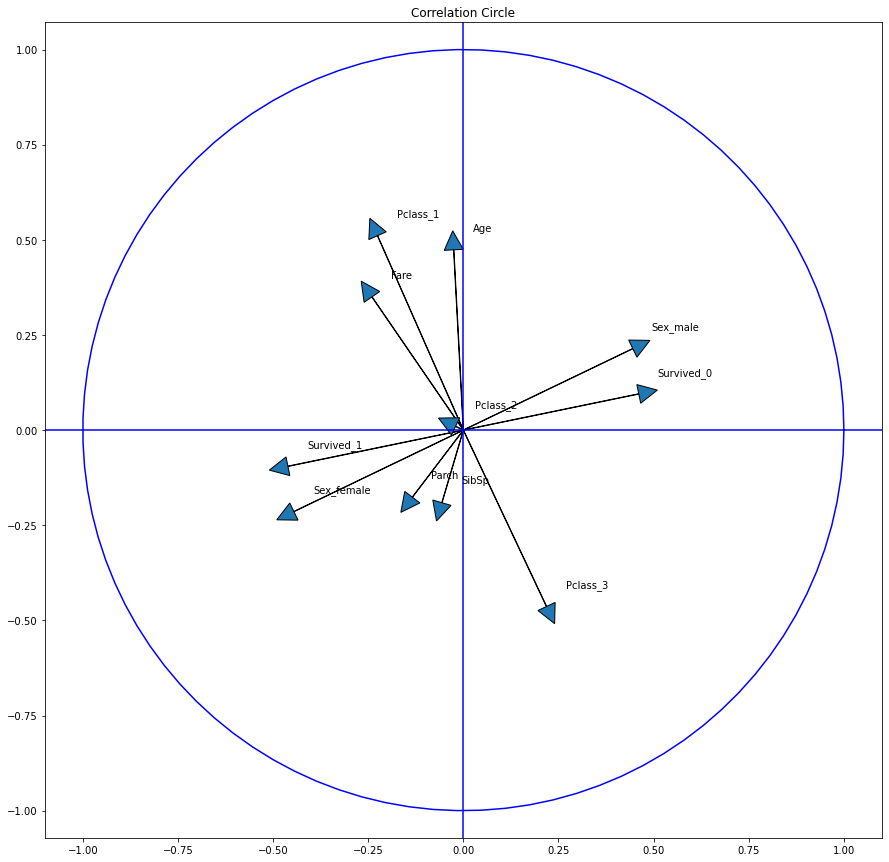

In [6]:
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, my_pca.C.shape[1]):
    plt.arrow(0,0, my_pca.eigVec[i, 0], # x - PC1
        my_pca.eigVec[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(my_pca.eigVec[i, 0] + 0.05, my_pca.eigVec[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()

# Parte 6 
### Si yo fuera un pasajero del Titanic, ¿qué atributos o características maximizarían mi probabilidad de sobrevivencia?

Parece ser que el atributo que más determina la maximización de probabilidad de supervivencia es el género de los pasajeros, donde **si se es mujer existía un alto grado** de que sobreviviera.

Por otra lado, parece que también podrían maximizar la probabilidad de supervivencia:
* El precio pagado por las entradas 
* Si se era de primera clase 
* La edad que tuviera los pasajeros.

Por último, existe también una posible relación de probabilidad de supervivencia pero de menor impacto que las anteriores:
* Total de padres e hijos a bordo que tuviera el pasajero
* Total de hermanos y esposa a bordo que tuviera el pasajero.

# Parte 7
Por motivos de verificación, repita el experimento pero esta vez utilizando la biblioteca scikit-learn (sklearn)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
C = pca.fit_transform(df_scaled)

In [9]:
import numpy as np
inertia = pca.explained_variance_ratio_
V = pca.transform(np.identity(df_scaled.shape[1]))

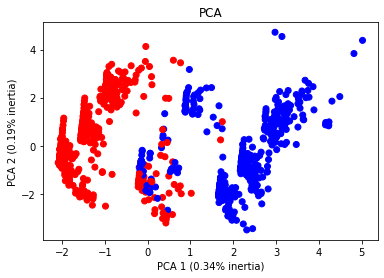

In [10]:
import matplotlib.pyplot as plt
plt.scatter(np.ravel(C[:,0]),np.ravel(C[:,1]),c = ['b' if i==1 else 'r' for i in df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[1],))
plt.title('PCA')
plt.show()

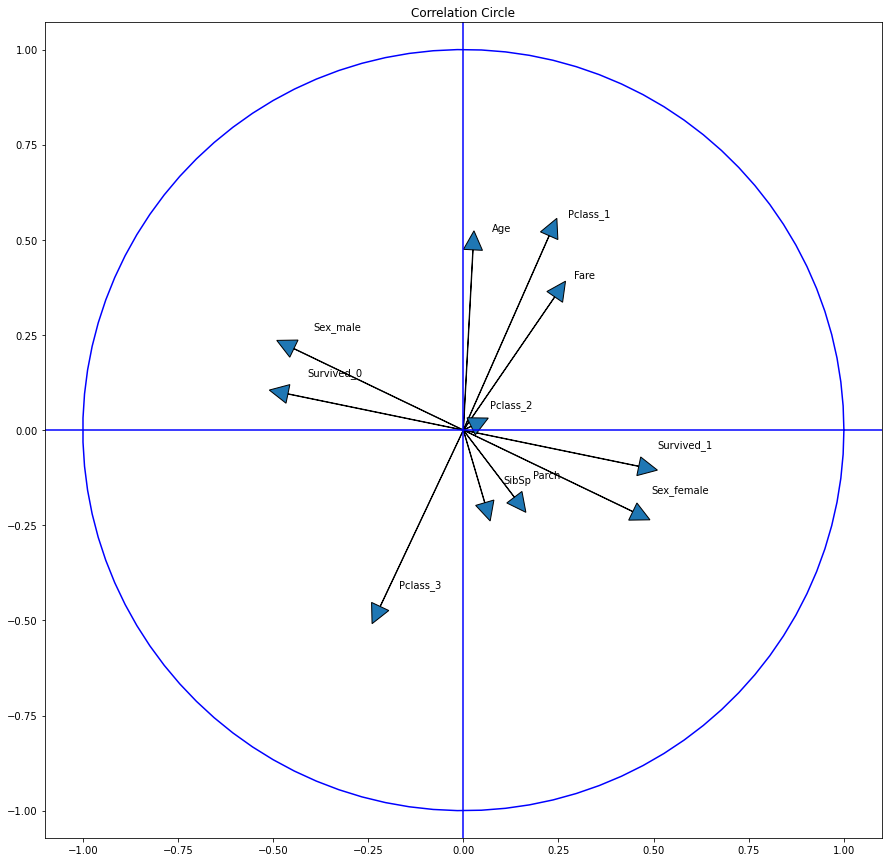

In [11]:
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, V[i, 0], # x - PC1
        V[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()

# Parte 8.

### ¿Hay alguna diferencia entre las gráficas? 

* Sí existe, debido a que parecen que las gráficas estan de una formas transpuestas entre sí, es decir que los valores negativos son positivos en una gráfica entre otra.

### De ser así, ¿por qué cree que ocurrió esto? 

* Se considera que esto ocurre debido a que la implementación que se realiza en scikit-learn, tiene alguna modificación en el algoritmo seguido para obtener el PCA visto en clase.

### ¿Impacta el resultado de alguna manera?

* No tiene ningún impacto, debido a que debe de recordarse que el PCA son transformaciones lineales que buscan ver los datos desde una perspectiva que permita la maximización de la variabilidad de los mismos. El caso que se tiene expuesto, es únicamente un cambio de posición en los vectores pero la perspectiva en los datos es la misma.